## 1. Inspecting velocyto code

In [4]:
import os
import velocyto
from velocyto.commands import run10x
# Find the installation path of the velocyto package
velocyto_path = os.path.dirname(velocyto.__file__)

# Locate the run10x.py file
run10x_path = os.path.join(velocyto_path, 'commands', 'run10x.py')

# Print the path to verify
print(f"run10x.py is located at: {run10x_path}")

run10x.py is located at: /ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/velocyto/commands/run10x.py


In [5]:
def print_run10x_code():
    with open(run10x_path, 'r') as file:
        print(file.read())

# Call the function to print the code
print_run10x_code()

import sys
import os
import glob
import re
import gzip
import click
import numpy as np
import csv
from collections import defaultdict
import logging
from typing import *
import velocyto as vcy
from ._run import _run


logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)


@click.command(short_help="Runs the velocity analysis for a Chromium Sample")
@click.argument("samplefolder",
                type=click.Path(exists=True,
                                file_okay=False,
                                dir_okay=True,
                                readable=True,
                                writable=True,
                                resolve_path=True))
@click.argument("gtffile",
                type=click.Path(exists=True,
                                file_okay=True,
                                dir_okay=False,
                                readable=True,
                                resolve_path=True))
@cli

## 2. Load BCell snRNA dataset from the multi-ome using Scanpy


In [6]:
import scanpy as sc
import anndata as ad
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import sys

In [7]:
# load anndata objects
data_dir = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/outs/'
atac_path = os.path.join(data_dir, 'adata_aggregated_peak.leiden.h5ad')
rna_path = os.path.join(data_dir, 'adata_aggregated_gene.leiden.h5ad')

In [8]:
adata_rna = ad.read(rna_path)
adata_rna

2024-07-29 19:27:30,857 - DEBUG - Creating converter from 3 to 5


AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'
    obsp: 'connectivities',

2024-07-29 19:28:05,061 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-29 19:28:05,062 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-29 19:28:05,219 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-07-29 19:28:05,219 - DEBUG - findfont: score(FontEntry(fname='/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-07-29 19:28:05,220 - DEBUG - findfont: score(FontEntry(fname='/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-07-29 19:28:05,220 

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


2024-07-29 19:28:09,055 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-07-29 19:28:09,056 - DEBUG - findfont: score(FontEntry(fname='/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-07-29 19:28:09,057 - DEBUG - findfont: score(FontEntry(fname='/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-07-29 19:28:09,057 - DEBUG - findfont: score(FontEntry(fname='/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', varia

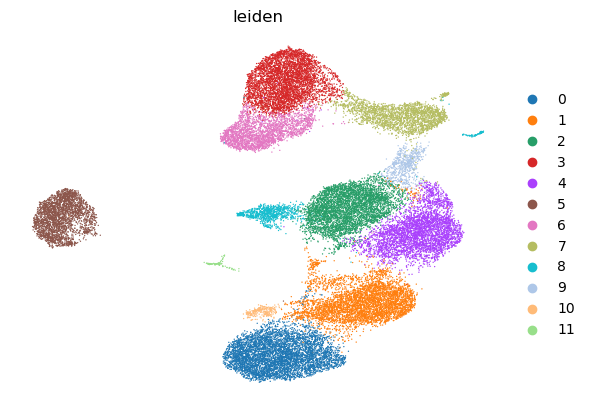

In [9]:
#umap colors by both cell metadata and var.names (gene_names)
sc.pl.umap(adata_rna, color=['leiden'], frameon=False) #save=True if you want to save the figure


/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


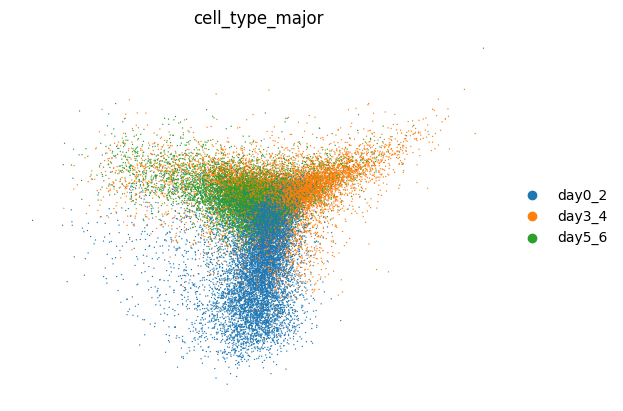

In [5]:
embedding_key = 'X_umap_features'
sc.pl.embedding(adata_rna, basis=embedding_key, color=['cell_type_major'], frameon=False)

In [6]:
adata_atac = ad.read(atac_path)
adata_atac

AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'cell_type_major', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index', 'leiden_joint'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


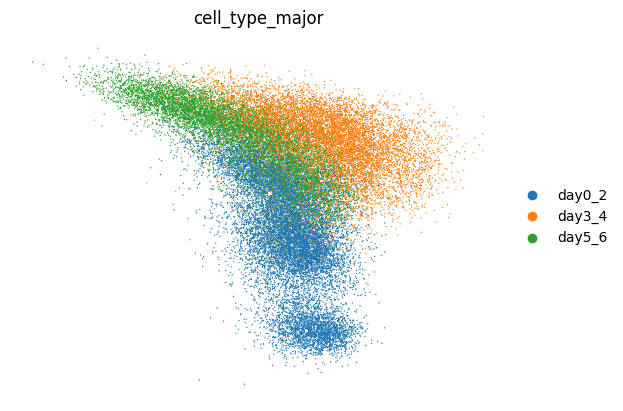

In [7]:
embedding_key = 'X_umap_features'
sc.pl.embedding(adata_atac, basis=embedding_key, color=['cell_type_major'], frameon=False)